Testing the nscore transformation table
========


In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib    
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `pygslib.gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= pygslib.gslib.read_gslib_file('../data/cluster.dat')  

In [3]:
# This is a 2D file, in this GSLIB version we require 3D data and drillhole name or domain code
# so, we are adding constant elevation = 0 and a dummy BHID = 1 
mydata['Zlocation']=0
mydata['bhid']=1

# printing to verify results
print (' \n **** 5 first rows in my datafile \n\n  ', mydata.head(n=5))

 
 **** 5 first rows in my datafile 

      Xlocation  Ylocation  Primary  Secondary  Declustering Weight  Zlocation  \
0       39.5       18.5     0.06       0.22                1.619          0   
1        5.5        1.5     0.06       0.27                1.619          0   
2       38.5        5.5     0.08       0.40                1.416          0   
3       20.5        1.5     0.09       0.39                1.821          0   
4       27.5       14.5     0.09       0.24                1.349          0   

   bhid  
0     1  
1     1  
2     1  
3     1  
4     1  


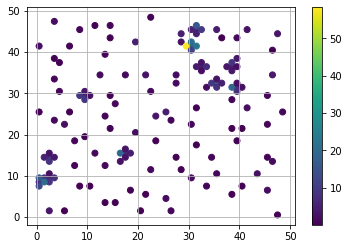

In [4]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

## The nscore transformation table function


In [5]:
print (pygslib.gslib.__dist_transf.nscore.__doc__)


nsc = nscore(va,transin,transout,getrank,[overwrite_va,overwrite_transin,overwrite_transout])

Wrapper for ``nscore``.

Parameters
----------
va : input rank-1 array('d') with bounds (nd)
transin : input rank-1 array('d') with bounds (nt)
transout : input rank-1 array('d') with bounds (nt)
getrank : input int

Other Parameters
----------------
overwrite_va : input int, optional
    Default: 0
overwrite_transin : input int, optional
    Default: 0
overwrite_transout : input int, optional
    Default: 0

Returns
-------
nsc : rank-1 array('d') with bounds (nd)



## Important. 

You may run ns_ttable in order to optain transin, transout

## Get the transformation table

In [6]:
transin,transout, error = pygslib.gslib.__dist_transf.ns_ttable(mydata['Primary'],mydata['Declustering Weight'])
print ('there was any error?: ', error!=0)

there was any error?:  False


##Get the normal score transformation

Note that the declustering is applied on the transformation tables

In [7]:
mydata['NS_Primary'] = pygslib.gslib.__dist_transf.nscore(mydata['Primary'],transin,transout,getrank=False)

<AxesSubplot:>

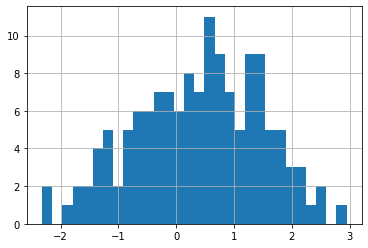

In [8]:
mydata['NS_Primary'].hist(bins=30)

## Normal score transformation using rank

In [9]:
mydata['NS_Primary'] = pygslib.gslib.__dist_transf.nscore(mydata['Primary'],transin,transout,getrank=True)

<AxesSubplot:>

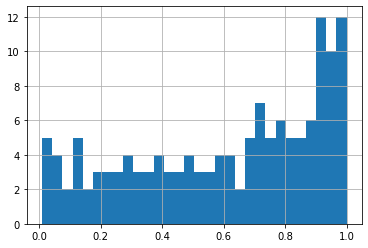

In [10]:
mydata['NS_Primary'].hist(bins=30)